In [3]:
#Alper Beykan YOLCU,161180072
#Image Processing Assignment 1

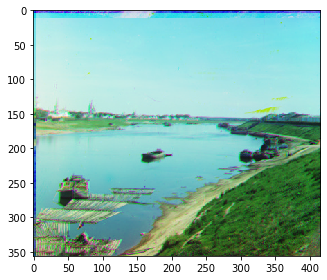

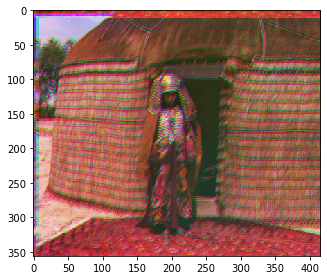

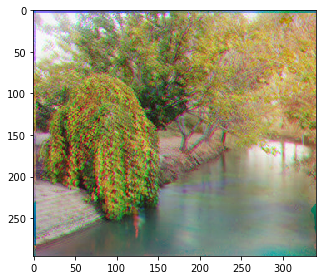

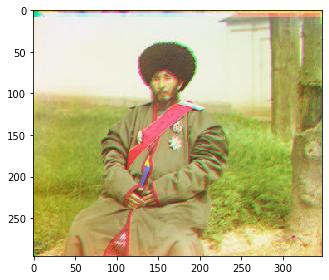

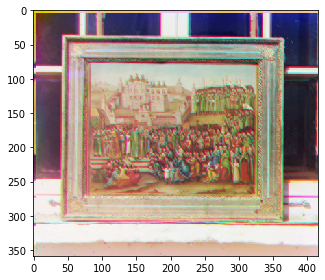

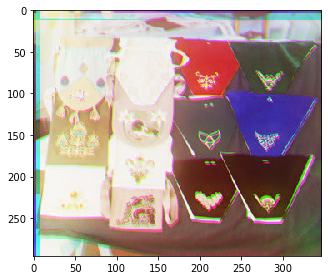

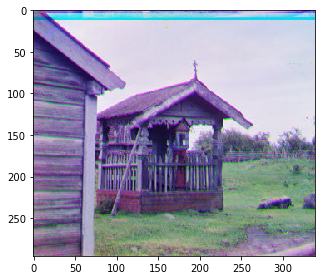

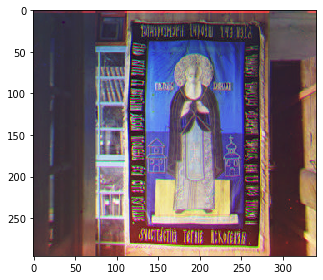

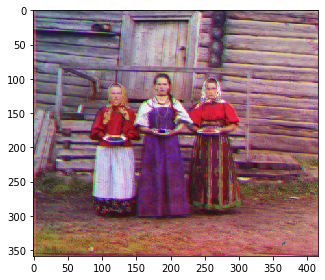

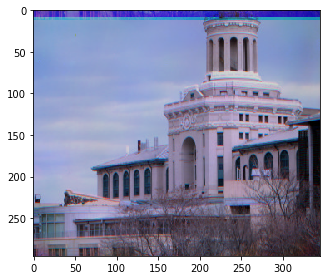

In [1]:
import cv2
import math
import numpy as np
import skimage as sk
import skimage.feature
import skimage.io as skio
import skimage.transform as sktr
from skimage.io import imread, imshow
from skimage import img_as_float
def split_3_channel(img):#input whole image, output 3 color channels as b g r
    height, width = img.shape[:2]
    b = img[0 : int(height/3) , 0: width]
    g = img[int(height/3) : int(2*height/3) , 0: width ]    
    r = img[int(2*height/3) : int(height/3)*3 , 0: width ]
    b, g, r = list(map(img_as_float, (b, g, r, )))
    return b, g, r
def cut_black_borders(b, g, r, displacement):
    #removing black borders of image
    height, width = b.shape
    bordering = lambda x: x[height//displacement : -height//displacement , width//displacement : -width//displacement]  
    b = bordering(b)
    g = bordering(g)
    r = bordering(r)
    return b, g, r
def im_rescale(im,scaler):#smalling the original image and canny filtering for edge detection and reducing blur
    im=sktr.rescale(im, scaler)
    im=sk.feature.canny(im, sigma=0.15)
    return im
def get_displacement(img1, img2, threshold=15):#finding best displacements for aligning 
    x = 0
    y = 0
    min_ssd = ssd(img1, img2)
    for u in range(threshold*-1, threshold):#in ranges of 15,15 balancing the image
        for v in range(threshold*-1, threshold):
            displaced_img = shift(img1, [u,v])
            new_ssd = ssd(displaced_img, img2)
            if new_ssd < min_ssd:#selecting best ssd
                min_ssd = new_ssd   
                x,y = u,v
    return [x, y]
def pyramidAlign(r, g, b, lvl,displacements = [[0, 0], [0,0]]):
    while(lvl>0):
        factor = 2 ** lvl
        scaler= (1/factor)
    # rescale the images
        rescaled_r = im_rescale(r,scaler)
        rescaled_g = im_rescale(g,scaler)
        rescaled_b = im_rescale(b,scaler)
        vecG = get_displacement(rescaled_g, rescaled_b)#displacement amounts
        shiftedG = shift(rescaled_g, vecG)
        vecR = get_displacement(rescaled_r, rescaled_b)#displacement amounts
        # arrange images with respect to rescaled image displacement
        g = shift(g, [factor*vecG[0] , factor*vecG[1]])
        r = shift(r, [factor*vecR[0], factor*vecR[1]])
        displacements[0][0] += vecG[0] * factor#first index is for representing green, second one represents red displacement 
        displacements[0][1] += vecG[1] * factor
        displacements[1][0] += vecR[0] * factor
        displacements[1][1] += vecR[1] * factor
        return np.dstack((r,g,b))
    return pyramidAlign(r, g, b, lvl-1, displacements)


def ssd(im1, im2):# sum of squared distances method for setting shifting vector
    return np.sum(np.sum((im1^im2)**2))

def x_shift(img, n):#shifting the imageces for better fitting at horizonal axis
    return np.roll(img, n, axis=1)

def y_shift(img, n):#shifting the imageces for better fitting at vertical axis
    return np.roll(img, n, axis=0)

def shift(im, d):# shifts the images by using defined functions
    return x_shift(y_shift(im, d[1]), d[0])

def colorize(path):#according to algorythim manin fuction that calling other functions one by one 
    im = skio.imread(path)
    im = sk.img_as_float(im)
    b, g, r = split_3_channel(im)
    b, g, r =cut_black_borders(b,g,r,15)
    pyramid_lvl=2
    colored = pyramidAlign(r, g, b, pyramid_lvl)*255#to avoid black screen we multiply it by 255(255,255,255)
    result_img = colored.astype(np.uint8)
    skio.imshow(result_img)# displaying the image
    skio.show()

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/00029u.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/00087u.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/00088v.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/00106v.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/00128u.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/00137v.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/00888v.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/01031v.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/01043u.jpg'
colorize(impath)

impath=imgpath='C:/Users/user/Desktop/dersler/imageProcessing/assignment_1/Assignment 1/images/31421v.jpg'
colorize(impath)